<a href="https://colab.research.google.com/github/rishabhm4/Densenet---Keras/blob/master/CNN_CIFAR10/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN on CIFAR10 and MNIST

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

Using TensorFlow backend.


##  CIFAR image(dataset)

In [0]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [0]:
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32,32,3]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=40000).batch(128).repeat()

[8]


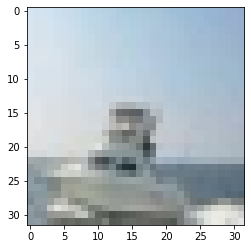

In [0]:
print(train_labels[100])
plt.imshow(train_images[100], cmap="Greys_r")

####  the model using 'keras.layers'

In [0]:
train_steps = 1500

layer_list = [ tf.keras.layers.Conv2D(filters = 64,kernel_size=3,padding='same',activation=tf.nn.relu),
              tf.keras.layers.Conv2D(filters = 64,kernel_size=3,padding='same',activation=tf.nn.relu),
               tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
              tf.keras.layers.Dropout(0.5),
              
              tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.nn.relu),
               tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.nn.relu),
               tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
              tf.keras.layers.Dropout(0.5),
              
               tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.nn.relu),
               tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
                    
              
              tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.nn.relu),
               tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
              
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(10,activation='softmax')]  
model = tf.keras.Sequential(layer_list)

In [0]:
opt = tf.optimizers.Adam(0.001)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.3024916648864746 Accuracy: 0.078125
Loss: 2.2120609283447266 Accuracy: 0.19617187976837158
Loss: 2.1037721633911133 Accuracy: 0.28187501430511475
Loss: 2.1298694610595703 Accuracy: 0.3235156238079071
Loss: 2.1421315670013428 Accuracy: 0.33218318223953247
Loss: 2.0674142837524414 Accuracy: 0.3639843761920929
Loss: 2.0027928352355957 Accuracy: 0.37953126430511475
Loss: 2.0276436805725098 Accuracy: 0.42476561665534973
Loss: 2.031627655029297 Accuracy: 0.4427540898323059
Loss: 1.9995372295379639 Accuracy: 0.462890625
Loss: 1.9845643043518066 Accuracy: 0.47929686307907104
Loss: 1.9684754610061646 Accuracy: 0.4881249964237213
Loss: 1.9910218715667725 Accuracy: 0.5221925973892212
Loss: 1.9158459901809692 Accuracy: 0.5106250047683716
Loss: 1.9103682041168213 Accuracy: 0.5484374761581421
Loss: 1.8779425621032715 Accuracy: 0.5567968487739563


#### Sanity check

In [0]:
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32,32,3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.5756999850273132


## Methods we tried

- We tried combination of valid and same padding with the same configuration but the accuracy was lower 
- Used weight dropout, which resulted in increase in accuracy
- When using without activation function in the output layer the accuracy was around ~77% (1500) but with softmax function it signifcantly decreased to ~56% (train accuracy)
- Used Adam as an optimizer instead of Stochastic Gradient descent which resulted in ~10% increase in accuracy

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0

## MNIST dataset 

5


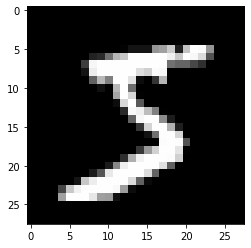

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

# first difference: data is not reshaped to 784 anymore, but 28x28x1
# note the 1 color channel!! this is important
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)


In [0]:
train_steps=1000

layer_list =[
    tf.keras.layers.Conv2D(128, 3, padding='valid', activation='relu', input_shape=(28, 28 ,1)),
     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
     tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)]
   # Dense(1)]
model = tf.keras.Sequential(layer_list)

In [0]:
#compile model using accuracy to measure model performance
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Adam makes things much smoother
opt = tf.optimizers.Adam(0.01)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.2913389205932617 Accuracy: 0.109375
Loss: 0.1638101041316986 Accuracy: 0.7582031488418579
Loss: 0.06666335463523865 Accuracy: 0.9578906297683716
Loss: 0.12947236001491547 Accuracy: 0.9654687643051147
Loss: 0.046500422060489655 Accuracy: 0.9739062786102295
Loss: 0.07407531887292862 Accuracy: 0.973919153213501
Loss: 0.038855329155921936 Accuracy: 0.979687511920929
Loss: 0.051047433167696 Accuracy: 0.98046875
Loss: 0.03440622240304947 Accuracy: 0.9801562428474426
Loss: 0.046908702701330185 Accuracy: 0.9797656536102295
Loss: 0.09307347983121872 Accuracy: 0.981203019618988


In [0]:

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))


Test acc: 0.9858999848365784


#### using MNIST dataset without  'softmax' results in accof 98% while when activation used hardly 57-58% acc is acheived